## HR analytics

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
len(df)

19158

Now let's take a look at ths missing data.

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
percent_missing

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

<AxesSubplot:>

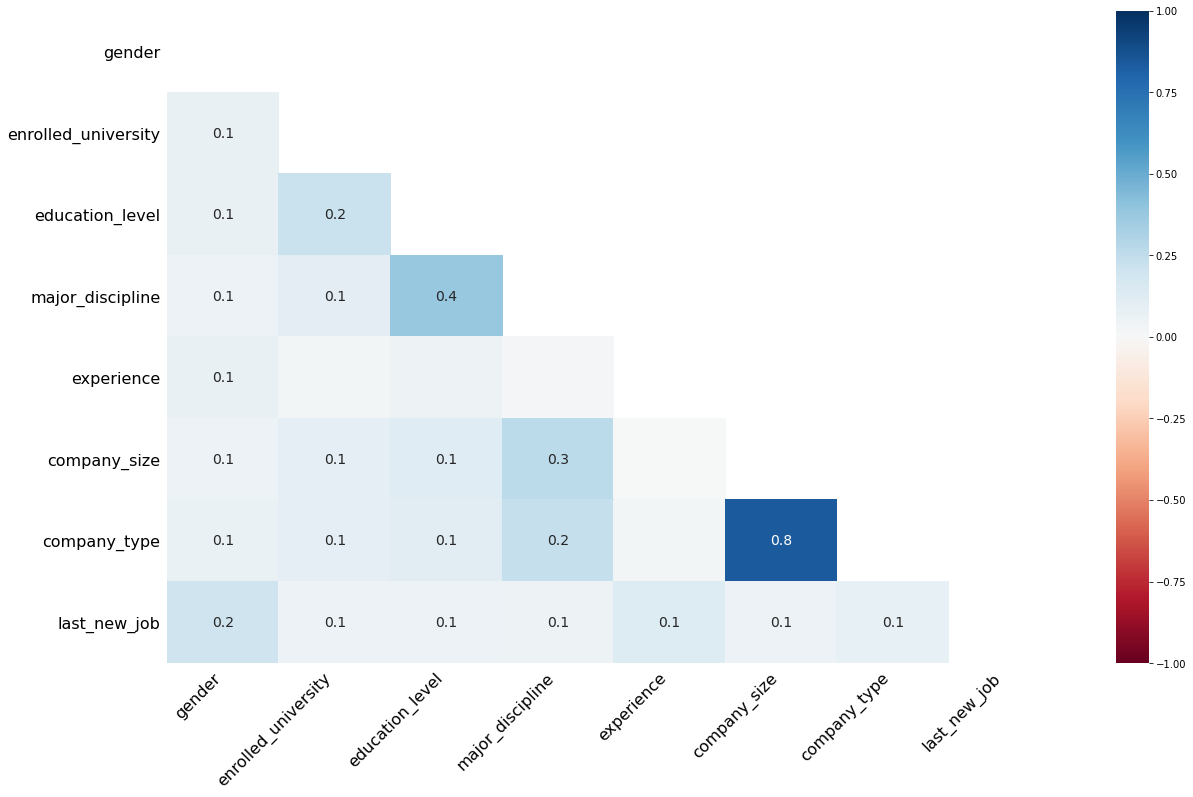

In [11]:
import missingno as msno

msno.heatmap(df)

Here we are seeing that most of the features that contains missing values are categorical and we can fill those value by mode , but this could leads to imbalanced data and make our ml model baised so it's better to delete those.


Next, let's take a look at weather our dataset is balanced or not.

In [33]:
df.dropna(inplace=True)

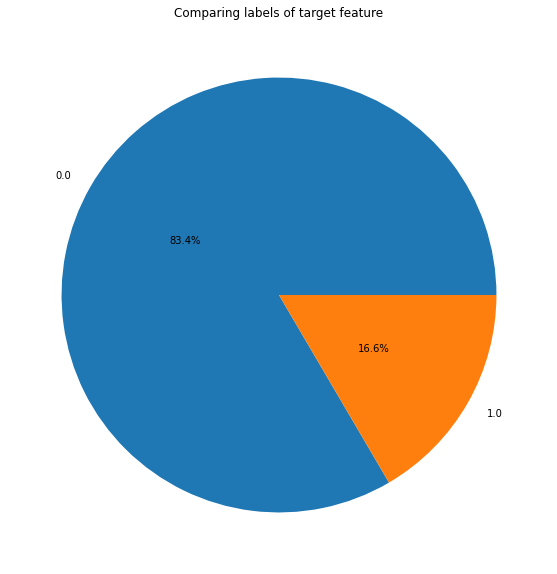

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

values = df['target'].value_counts().values.tolist()
labels = df['target'].value_counts().index
plt.figure(figsize= (10,10))
plt.title('Comparing labels of target feature')
plt.pie(x = values, labels = labels, autopct='%1.1f%%', pctdistance= .5)
plt.show()

We can see from the pie chart above that our data is imbalanced so we need to fix this before modeling.


Next, let's take a look at the distribution of each categorical data.

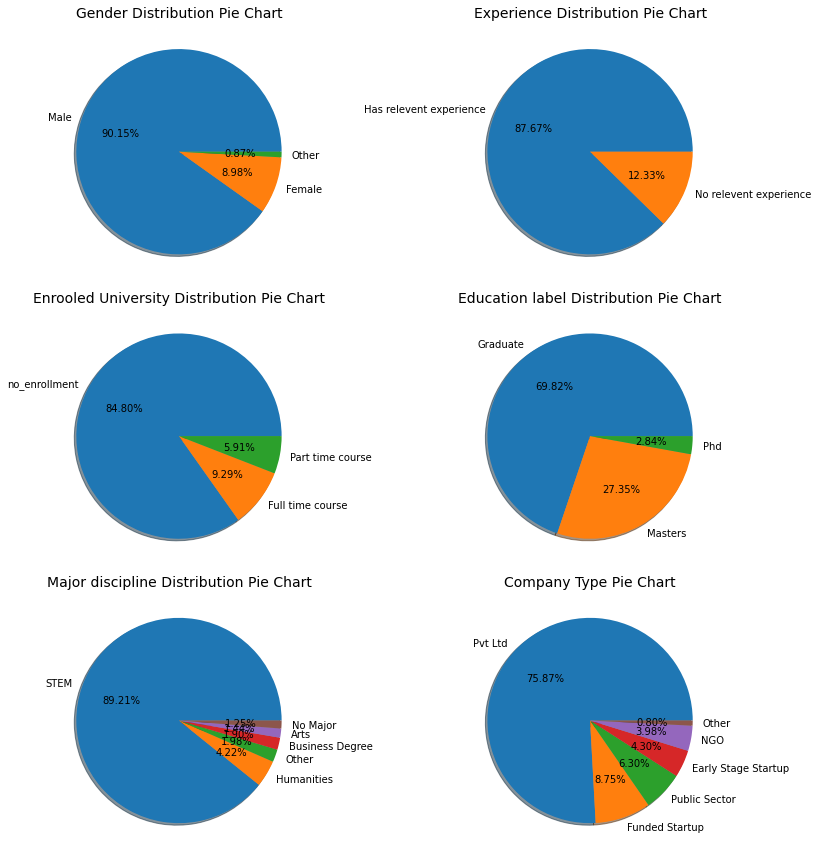

In [60]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6)) = ax

labels = df['gender'].value_counts().index
values = df['gender'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})

labels = df['relevent_experience'].value_counts().index
values = df['relevent_experience'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("Experience Distribution Pie Chart", fontdict={'fontsize': 14})

labels = df['enrolled_university'].value_counts().index
values = df['enrolled_university'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("Enrooled University Distribution Pie Chart", fontdict={'fontsize': 14})

labels = df['education_level'].value_counts().index
values = df['education_level'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("Education label Distribution Pie Chart", fontdict={'fontsize': 14})

labels = df['major_discipline'].value_counts().index
values = df['major_discipline'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax5.set_title("Major discipline Distribution Pie Chart", fontdict={'fontsize': 14})



labels = df['company_type'].value_counts().index
values = df['company_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax6.set_title("Company Type Pie Chart", fontdict={'fontsize': 14})


plt.tight_layout()
plt.show()

From the graph we can see that every categorical data has a majority class.


Next, let's explroe the numerical data.

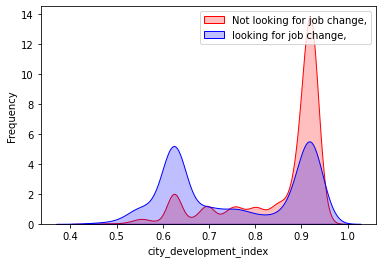

In [17]:
g = sns.kdeplot(df['city_development_index'][(df["target"] == 0) & (df['city_development_index'].notnull())], color="Red", shade = True)
g = sns.kdeplot(df['city_development_index'][(df["target"] == 1) & (df['city_development_index'].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel('city_development_index')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])

From this graph we can see that:
1. People whose city_development_index ranging in around 0.666 and and around 0.9 are interested in changing.
2. People are totally not interested in job change whose city_development_index are nearly 0.9

In [36]:
df['experience'].unique()

array(['15', '>20', '13', '7', '5', '16', '11', '<1', '18', '19', '12',
       '10', '9', '2', '6', '4', '14', '3', '8', '17', '20', '1'],
      dtype=object)

In [37]:
df_exp = df.replace(['>4', '<1', '>20'], ['5', '0', '21'])
# df['experience'] = df['experience'].astype(int)
df_exp.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,5,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


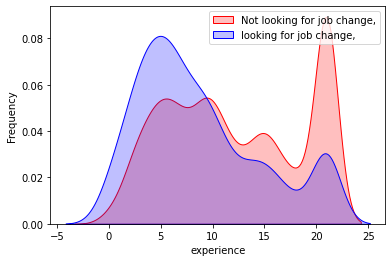

In [38]:
df_exp['experience'] = df_exp['experience'].astype(int)

g = sns.kdeplot(df_exp['experience'][(df_exp["target"] == 0) & (df_exp['experience'].notnull())], color="Red", shade = True)
g = sns.kdeplot(df_exp['experience'][(df_exp["target"] == 1) & (df_exp['experience'].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel('experience')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])

From this graph we can see that:
1. Those whose experience are around 5 years are most likely to change their jobs.
2. People who have worked 20 years is not willing to change his/her job.

In [39]:
df['last_new_job'].unique()

array(['>4', '4', '1', '3', '2', 'never'], dtype=object)

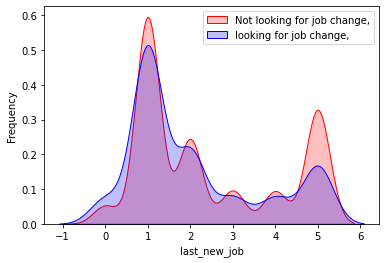

In [40]:
df_new_job = df.replace(['>4', 'never'], ['5', '0'])

df_new_job['last_new_job'] = df_new_job['last_new_job'].astype(int)
g = sns.kdeplot(df_new_job['last_new_job'][(df_new_job["target"] == 0) & (df_new_job['last_new_job'].notnull())], color="Red", shade = True)
g = sns.kdeplot(df_new_job['last_new_job'][(df_new_job["target"] == 1) & (df_new_job['last_new_job'].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel('last_new_job')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])

From this graph we can see that:
1. Those who left their last job 5 years ago are most likely to change their jobs.

Finally. Let's take a look at our numerical data's correlation.

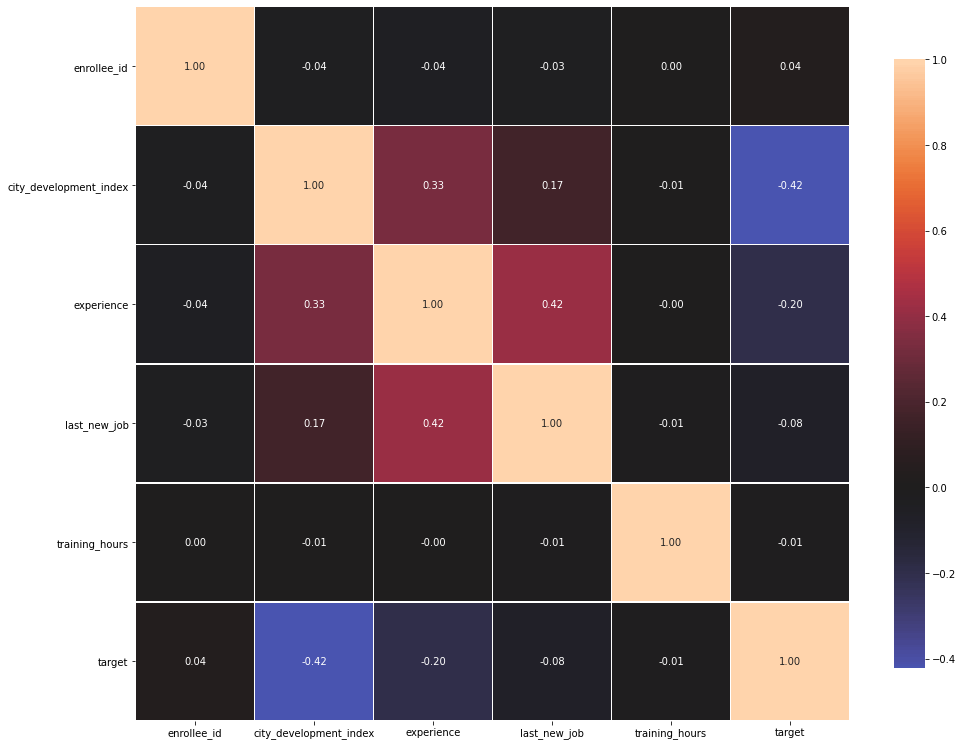

In [42]:
dff = df_exp.replace(['>4', 'never'], ['5', '0'])
dff['last_new_job'] = dff['last_new_job'].astype(int)



def correlation_heatmap(train):
    correlations = train.corr()
    
    fig, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()

    
correlation_heatmap(dff)

No useful info in here.

## HR Employee Attrition


In [52]:
df2 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.txt', sep='\t')
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [56]:
len(df2)

1470

From the information above we can see that there is no missing values.

Now let's see if the target is imbalanced.

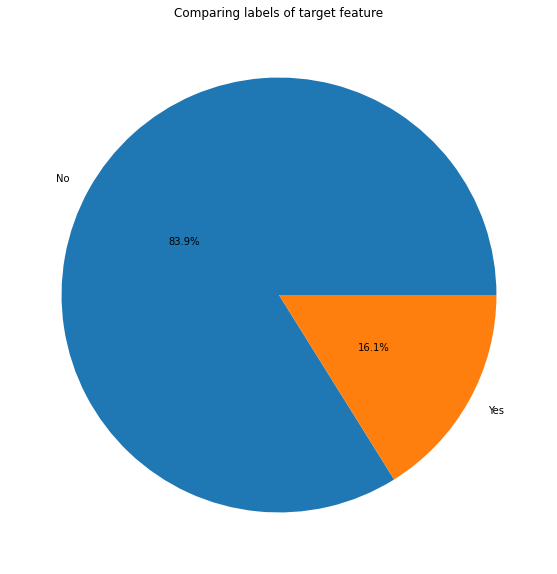

In [58]:
values = df2['Attrition'].value_counts().values.tolist()
labels = df2['Attrition'].value_counts().index
plt.figure(figsize= (10,10))
plt.title('Comparing labels of target feature')
plt.pie(x = values, labels = labels, autopct='%1.1f%%', pctdistance= .5)
plt.show()

From this char we can see that the target is imbalanced.

Next, let's take a look at the distribution of each categorical data.

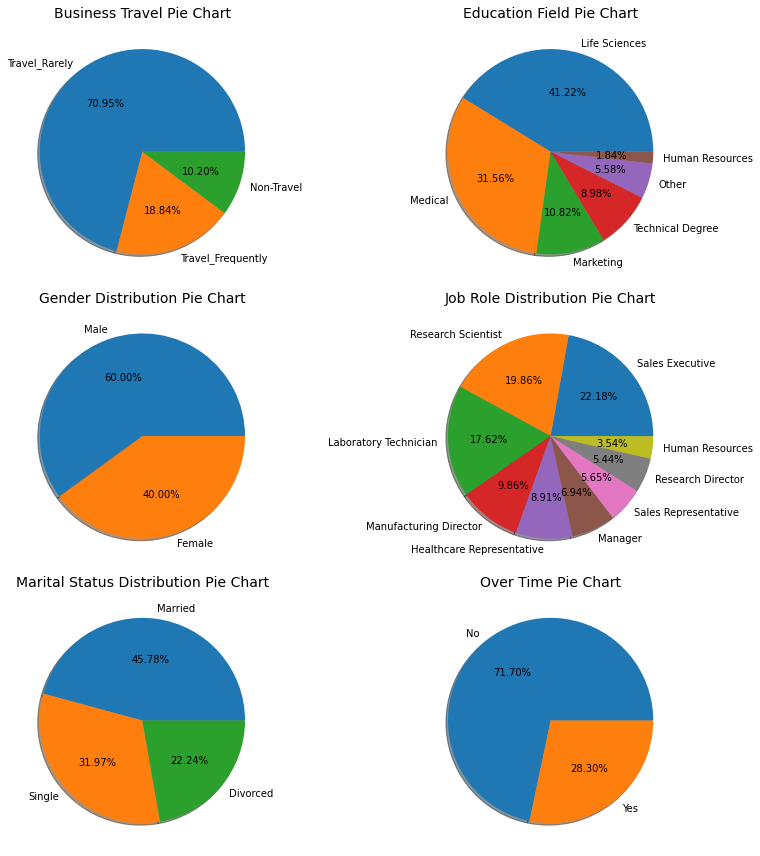

In [59]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6)) = ax

labels = df2['BusinessTravel'].value_counts().index
values = df2['BusinessTravel'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("Business Travel Pie Chart", fontdict={'fontsize': 14})

labels = df2['EducationField'].value_counts().index
values = df2['EducationField'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("Education Field Pie Chart", fontdict={'fontsize': 14})

labels = df2['Gender'].value_counts().index
values = df2['Gender'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})

labels = df2['JobRole'].value_counts().index
values = df2['JobRole'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("Job Role Distribution Pie Chart", fontdict={'fontsize': 14})

labels = df2['MaritalStatus'].value_counts().index
values = df2['MaritalStatus'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax5.set_title("Marital Status Distribution Pie Chart", fontdict={'fontsize': 14})



labels = df2['OverTime'].value_counts().index
values = df2['OverTime'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax6.set_title("Over Time Pie Chart", fontdict={'fontsize': 14})


plt.tight_layout()
plt.show()

In [61]:
df2 = df2.replace(['Yes', "No"], ['1', '0'])
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [62]:
df2['Attrition'] = df2['Attrition'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

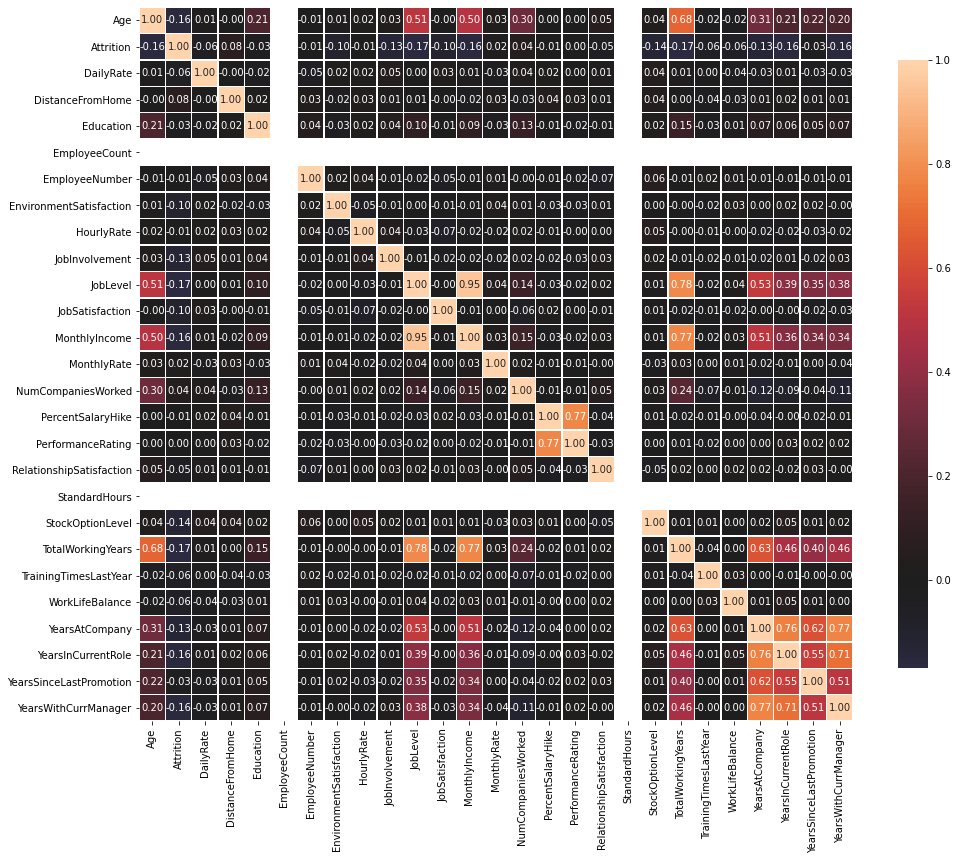

In [63]:
correlation_heatmap(df2)

From the correlation heatmap we can see that almost all feature are of equal importance to the target.

Then, let's choose some numerical features to do the visualization.

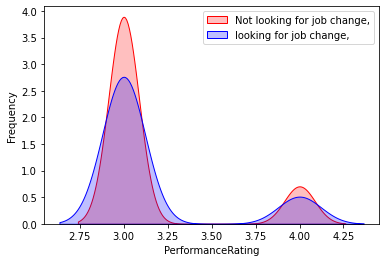

In [65]:
g = sns.kdeplot(df2['PerformanceRating'][(df2["Attrition"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df2['PerformanceRating'][(df2["Attrition"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('PerformanceRating')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])

This is kind of counter-intuitive because one might think that people with lower performance rating tends to looking for a new job. It turns out that people with lower performance rating tends to keep his/her current job.

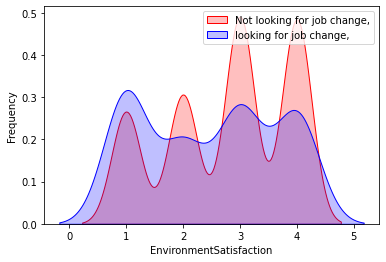

In [70]:
g = sns.kdeplot(df2['EnvironmentSatisfaction'][(df2["Attrition"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df2['EnvironmentSatisfaction'][(df2["Attrition"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('EnvironmentSatisfaction')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])

From this picture we can see that:
1. Those who are not satisfied with the working enviroment tends to look for a new job.
2. Those who are satisfied with the working enviroment tends to stay with their job.

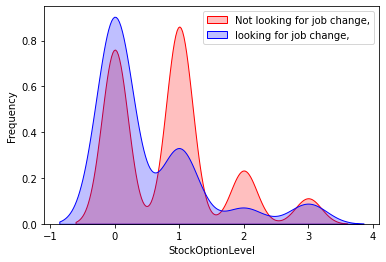

In [71]:
g = sns.kdeplot(df2['StockOptionLevel'][(df2["Attrition"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df2['StockOptionLevel'][(df2["Attrition"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('StockOptionLevel')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])

From this picture we can see that:
1. The more stock/option one has, the less he/she wants to leave their job.

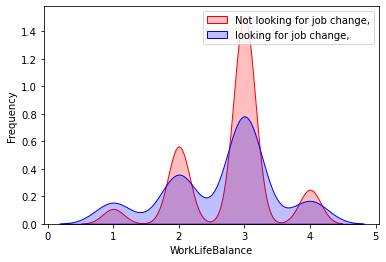

In [77]:
g = sns.kdeplot(df2['WorkLifeBalance'][df2["Attrition"] == 0], color="Red", shade = True)
g = sns.kdeplot(df2['WorkLifeBalance'][df2["Attrition"] == 1], ax =g, color="Blue", shade= True)
g.set_xlabel('WorkLifeBalance')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])

From this picture we can see that one tends to keep his/her current job if the work life balance is good.